In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [6]:
import statsmodels.formula.api as smf

In [2]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))


In [12]:
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse


In [14]:
df_raw = pd.read_csv('체질검사.csv', encoding = 'cp949')
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

lr_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

dt_model = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = 8,
                                min_samples_split = 20,
                                max_depth = 4)
dt_model.fit(df_train_x, df_train_y)

rf_model = RandomForestRegressor(random_state = 1234,
                                n_estimators = 100,
                                min_samples_leaf = 6,
                                min_samples_split = 14,
                                max_depth = 4)
rf_model.fit(df_train_x, df_train_y)

gb_model = GradientBoostingRegressor(random_state = 1234,
                                    n_estimators = 30,
                                    min_samples_leaf = 11,
                                    min_samples_split = 22,
                                    max_depth = 4,
                                    learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           4.38e-68
Time:                        13:42:04   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=11, min_samples_split=22,
                          min_weight_fraction_leaf=0.0, n_estimators=30,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
models = ["회귀분석","의사결정나무","랜덤 포레스트","그래디언트 부스팅"]
mse, rmse, mae, mape = [],[],[],[]

lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))


In [27]:
dt_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))



In [28]:
rf_y_pred = rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [29]:
gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

In [30]:
mse

[20.147912278293234,
 28.634493304123627,
 24.822829014027725,
 24.715876257051274]

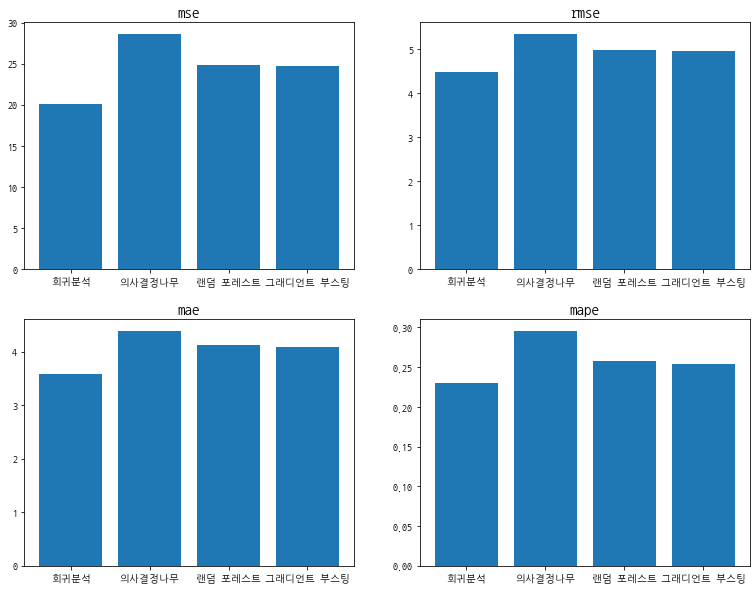

In [31]:
fig, ax = plt.subplots(2,2,figsize = (13,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(15)

# PCA - 주성분분석

In [37]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
import statsmodels.api as sm
import seaborn as sns

In [38]:
df_raw = pd.read_csv('직무능력평가.csv', encoding = 'cp949')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [39]:
df_raw_x = df_raw.drop('EVAL', axis = 1)
df_raw_y = df_raw['EVAL']


,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


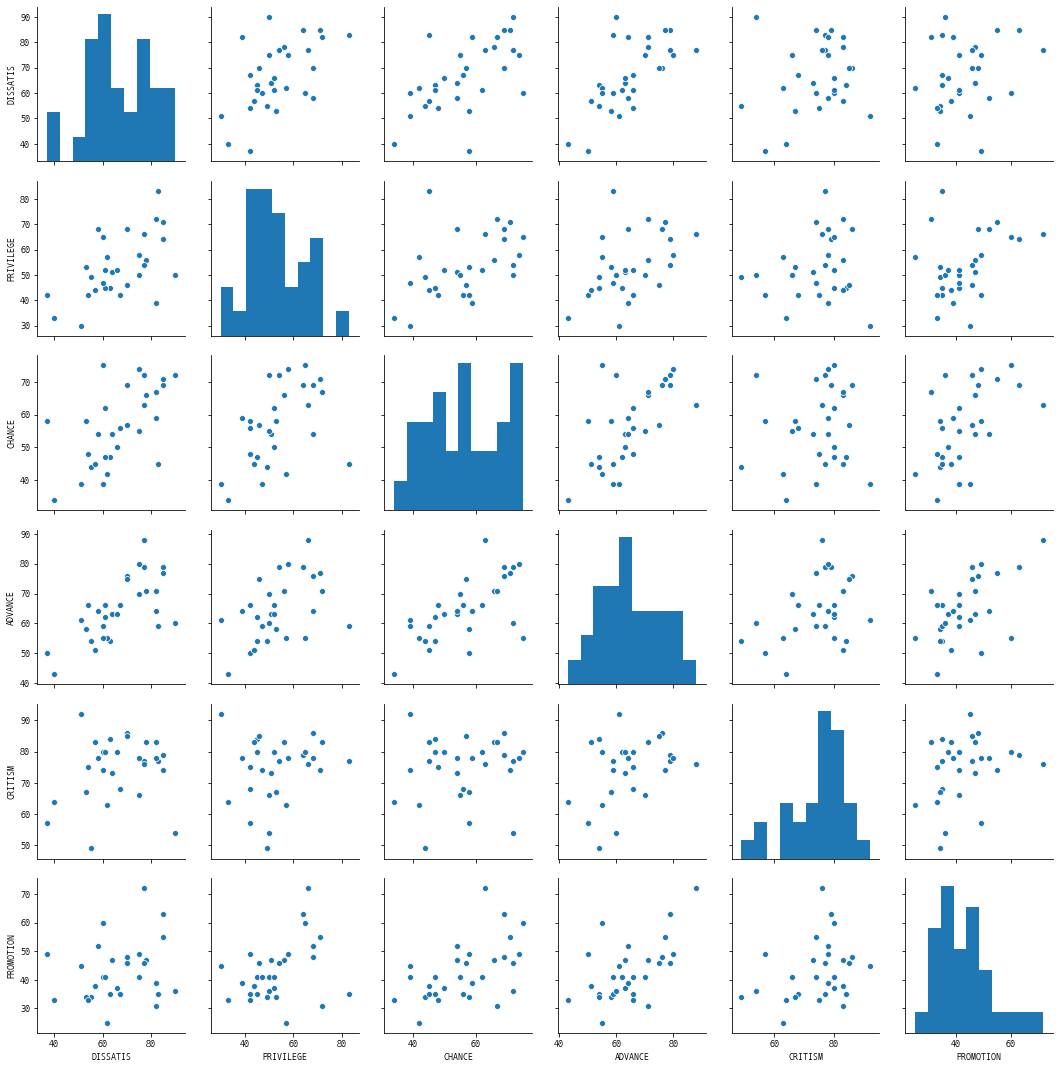

In [40]:
sns.pairplot(df_raw_x)
df_raw_x.corr().round(3)

In [41]:
df_raw_x.describe().round(3)


,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [45]:
x_cols = df_raw_x.columns
scaler = StandardScaler()

nd_scaled = scaler.fit_transform(df_raw_x)
print("Scaled data : \n {}".format(nd_scaled[:5].round(3)))
print("Shape : \n {}".format(nd_scaled.shape))

Scaled data : 
 [[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape : 
 (30, 6)


In [46]:
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


In [47]:
pca = PCA(n_components = 6)
nd_pca = pca.fit_transform(df_scaled)

print("PCA Data : \n {}".format(nd_pca[:5]))
print("Shape : \n {}".format(nd_pca.shape))

PCA Data : 
 [[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape : 
 (30, 6)


In [56]:
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2",'Prin3','Prin4','Prin5','Prin6'])

df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [57]:
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1,7)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


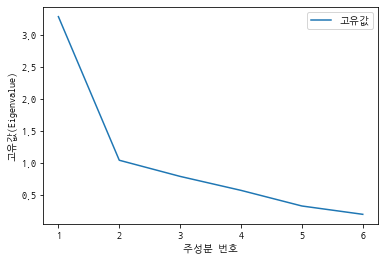

In [58]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'],
        label = "고유값")
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

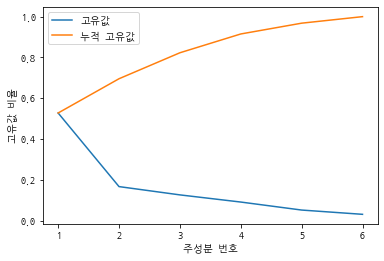

In [59]:
plt.plot(df_pca_stat['PrinNo'],
        df_pca_stat['EigenValueRatio'], label = "고유값")
plt.plot(df_pca_stat['PrinNo'],
        df_pca_stat['CumEigenValueRatio'],
        label = "누적 고유값")
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

In [60]:
x_cols = pd.DataFrame({"Feature": df_raw_x.columns})

df_eigenvector = pd.concat([x_cols,
                            pd.DataFrame(pca.components_.T * -1,
                                        columns = ["Prin1","Prin2",'Prin3','Prin4','Prin5','Prin6'])], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


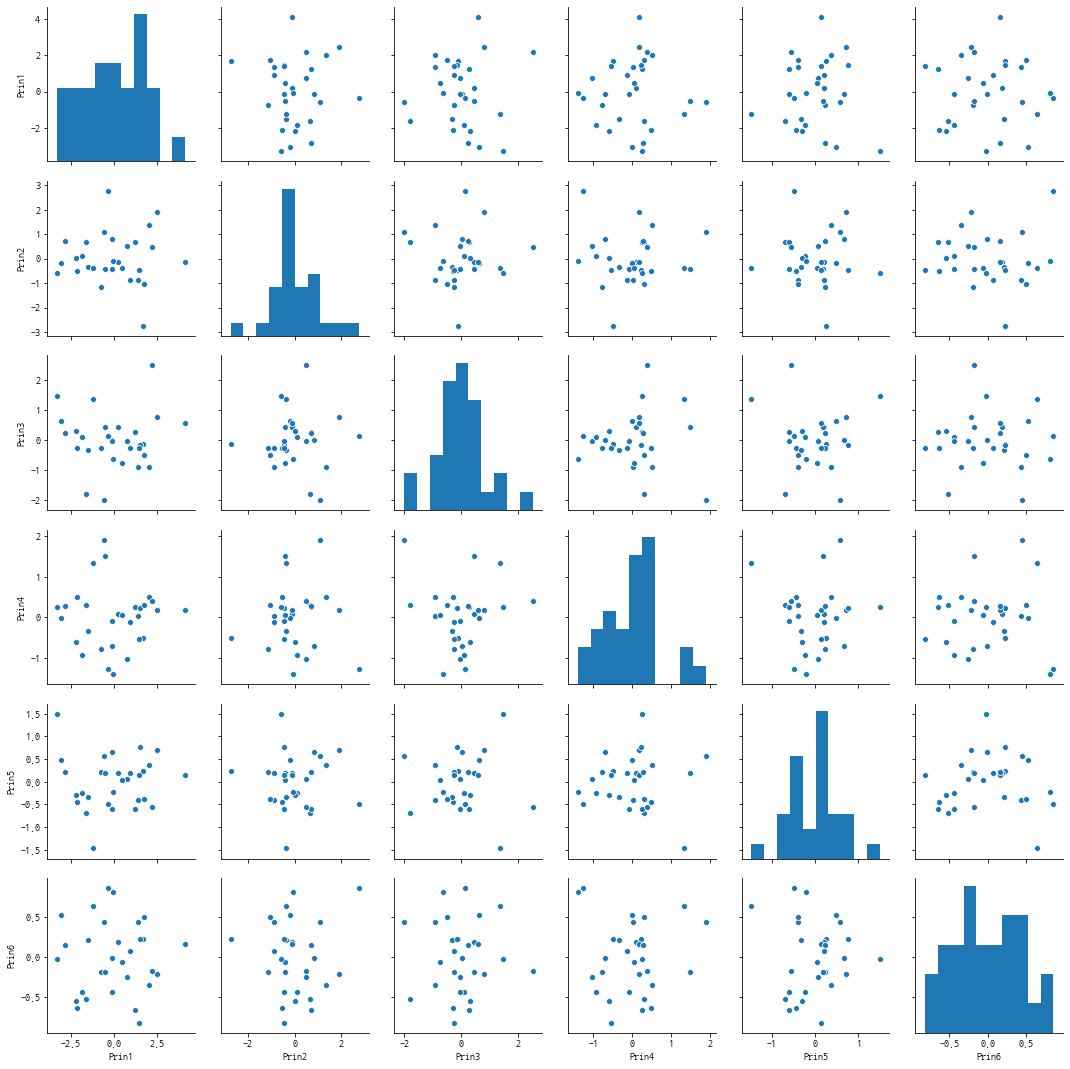

In [61]:
df_pca.corr().round(3)
sns.pairplot(df_pca)

In [ ]:
Prin1가 mean concavity와 -0.258, mean concave points와 -0.261 등의 음의 관계,
Prin2가 mean fractal dimension과 -0.367의 음의 관계
Prin3가 texture error와 -0.375, smoothness error와 -0.309의 음의 관계
Prin4가 mean texture와 0.603, texture error와 0.360의 양의 관계
Prin5가 mean smoothness와 0.365, worst smoothness와 0.324의 양의 관계
Prin6가 symmetry error와 -0.490, worst symmetry와 -0.499의 음의 관계를 보인다.